In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns
import tensorflow as tf


# Step 1: Data Preprocessing
# Load the training and testing datasets

In [2]:
data = pd.read_excel(r'/Users/ankursharma/anaconda3/projects/Final Project/bank-full.xlsx') #45211 columns data by the file name bank-additional-full.csv

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Description of the dataset:

Bank marketing data:

age : age of the client.

job : type of job.

marital : marital status.

education : 'primary', 'secondary', 'tertiary', 'unknown'

default: has credit in default?

housing: has housing loan?

balance: bank balance.

loan: has personal loan?

contact: contact communication type ('cellular','telephone')

month: last contact month of year.

day_of_week: last contact day of the week.

duration: last contact duration, in seconds.

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact).

pdays: number of days that passed by after the client was last contacted from a previous campaign.

previous: number of contacts performed before this campaign and for this client.

poutcome: outcome of the previous marketing campaign.

In [4]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


no     39922
yes     5289
Name: y, dtype: int64

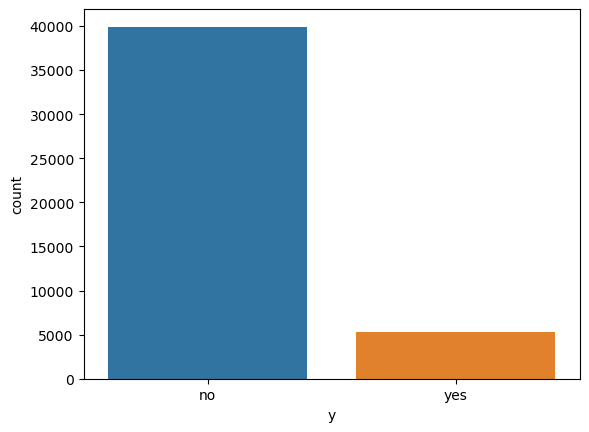

In [5]:
sns.countplot(x=data['y'], data=data)
counts = data['y'].value_counts()
counts

In [6]:
counts = data['y'].value_counts()


We found that only 5289 (11.7%) people subscribed a term deposit in the complete data set

In [7]:
data['age_range'] = pd.cut(x=data['age'], bins=[17,25,35,50,65,100], labels=['18-25', '26-35', '36-50','51-65', '65+'])

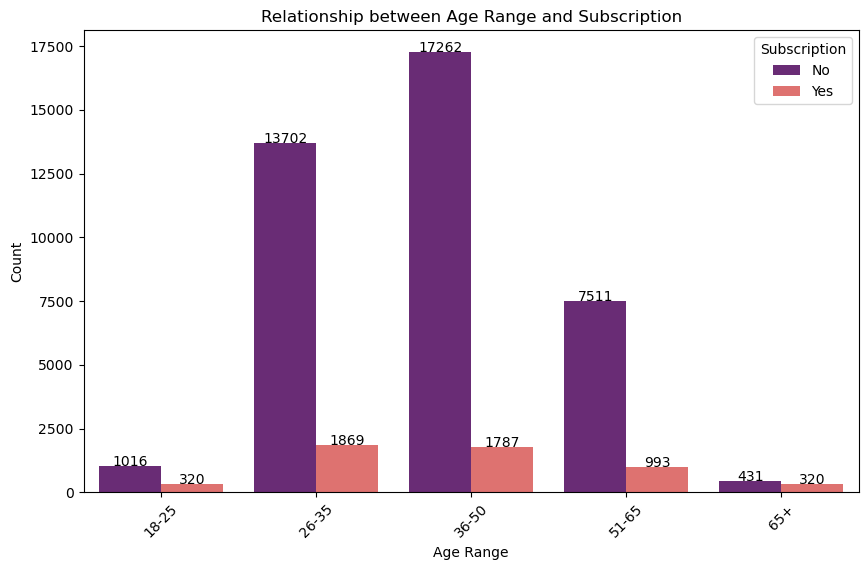

In [8]:
# Exploring the relationship between 'age_range' and 'y' (subscription)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='age_range', hue='y', palette='magma')
plt.title('Relationship between Age Range and Subscription')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscription', labels=['No', 'Yes'])

# Calculate and annotate the count values on the plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline')

plt.show()

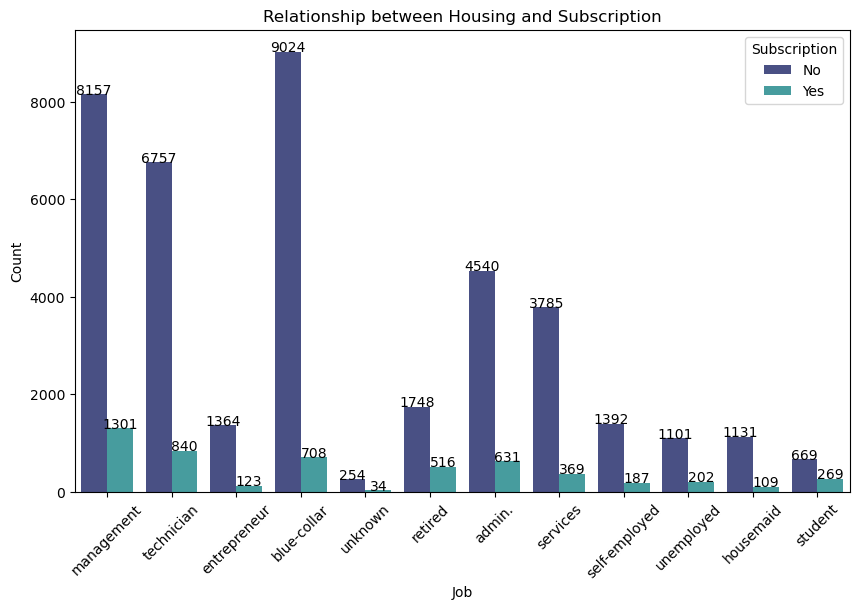

In [9]:
# Exploring the relationship between 'Job' and 'y' (subscription)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='job', hue='y', palette='mako')
plt.title('Relationship between Housing and Subscription')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscription', labels=['No', 'Yes'])

# Calculate and annotate the count values on the plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline')

plt.show()

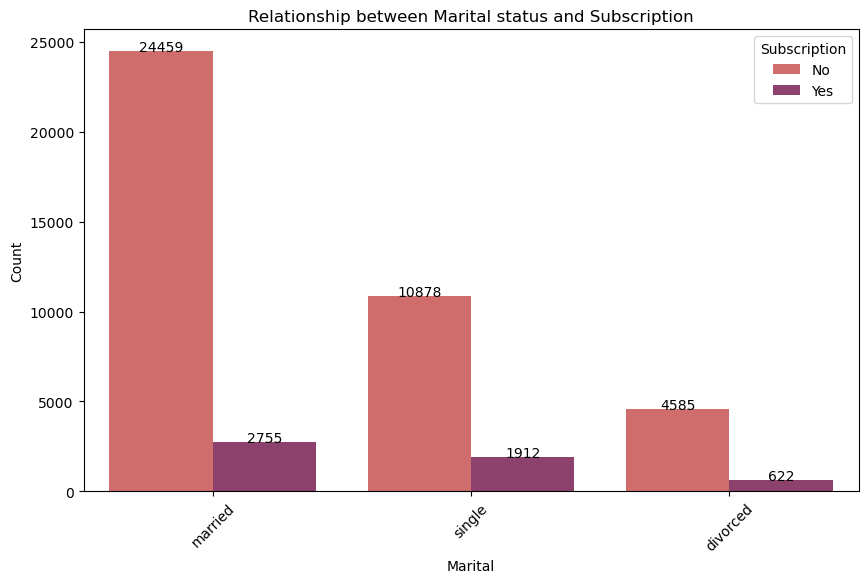

In [10]:
# Exploring the relationship between 'Marital status' and 'y' (subscription)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='marital', hue='y', palette='flare')
plt.title('Relationship between Marital status and Subscription')
plt.xlabel('Marital')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscription', labels=['No', 'Yes'])

# Calculate and annotate the count values on the plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline')

plt.show()

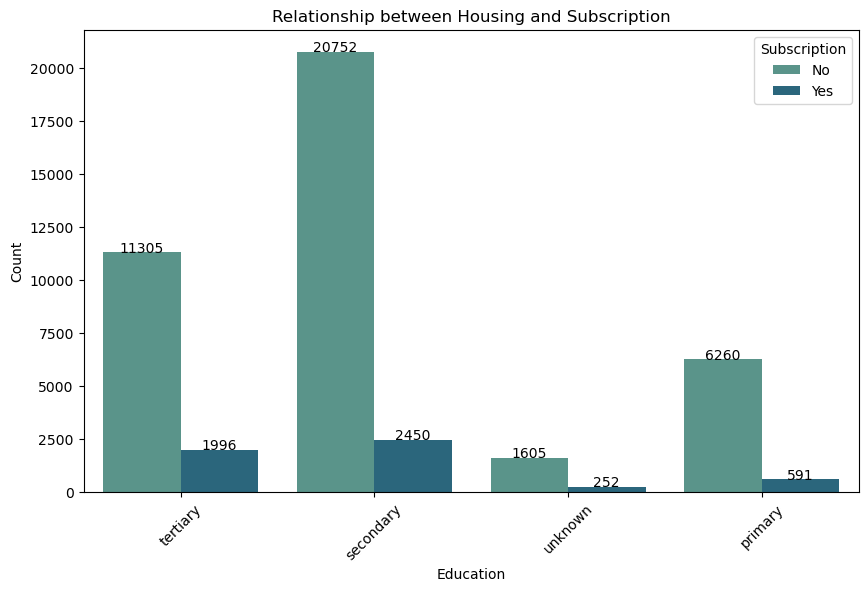

In [11]:
# Exploring the relationship between 'Education' and 'y' (subscription)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='education', hue='y', palette='crest')
plt.title('Relationship between Housing and Subscription')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscription', labels=['No', 'Yes'])

# Calculate and annotate the count values on the plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline')

plt.show()

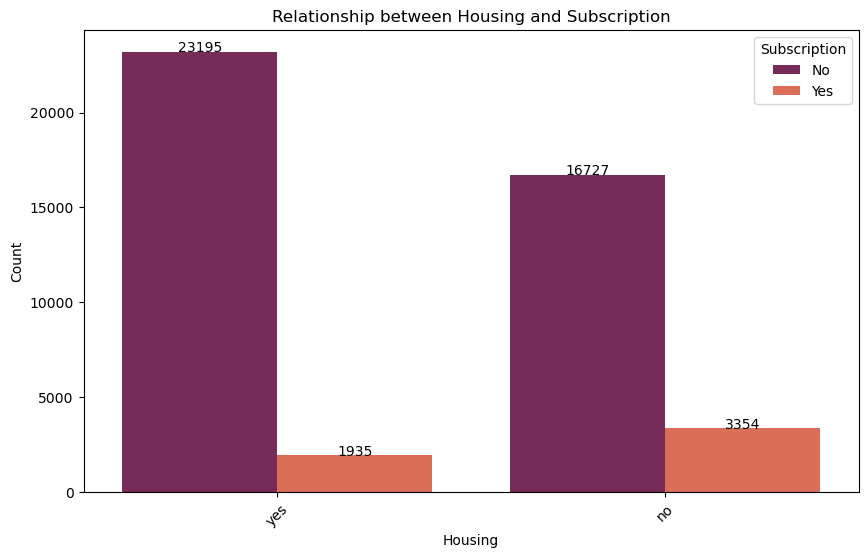

In [12]:
# Example: Exploring the relationship between 'Housing' and 'y' (subscription)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='housing', hue='y', palette='rocket')
plt.title('Relationship between Housing and Subscription')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscription', labels=['No', 'Yes'])

# Calculate and annotate the count values on the plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline')

plt.show()

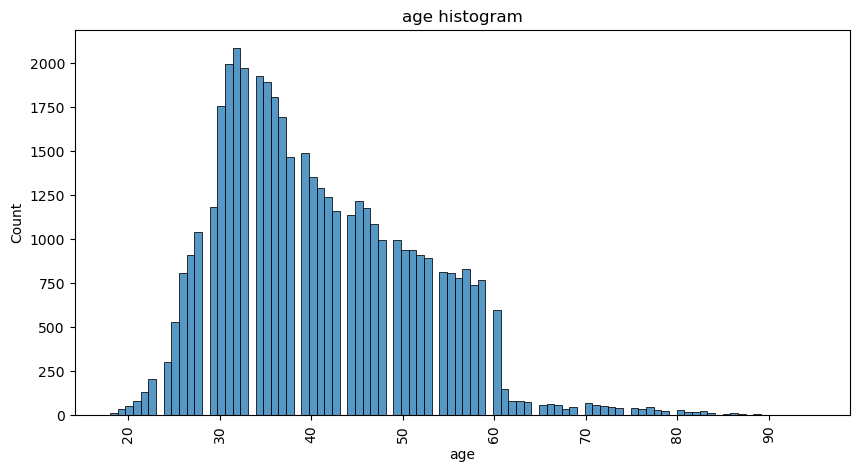

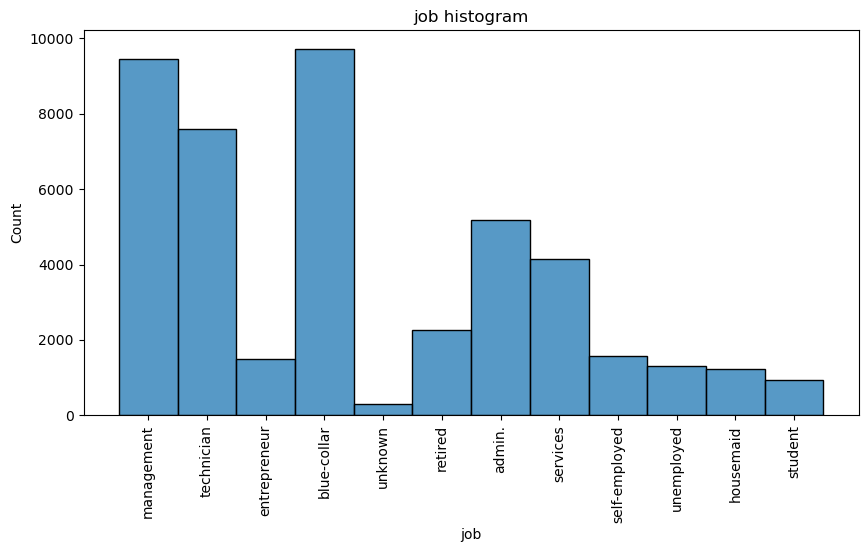

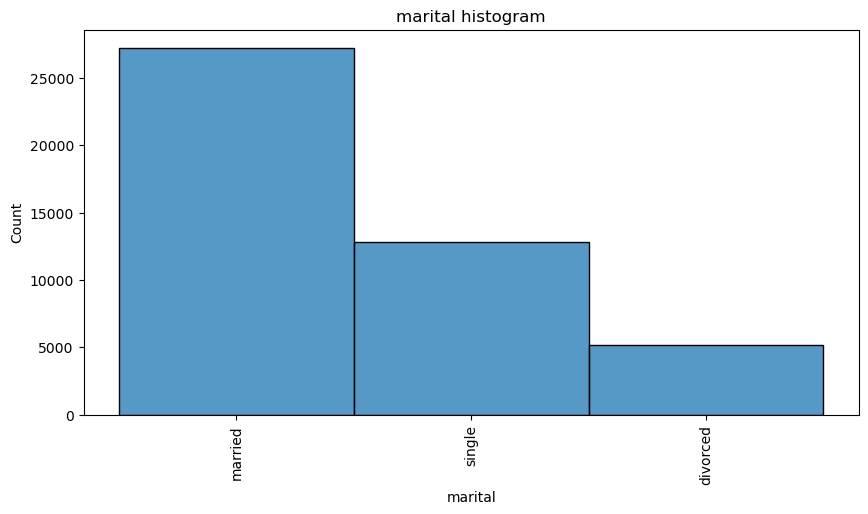

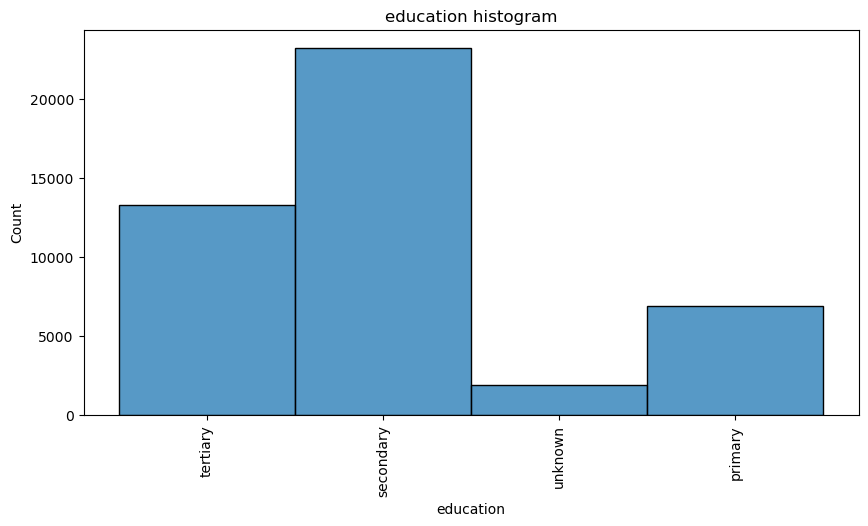

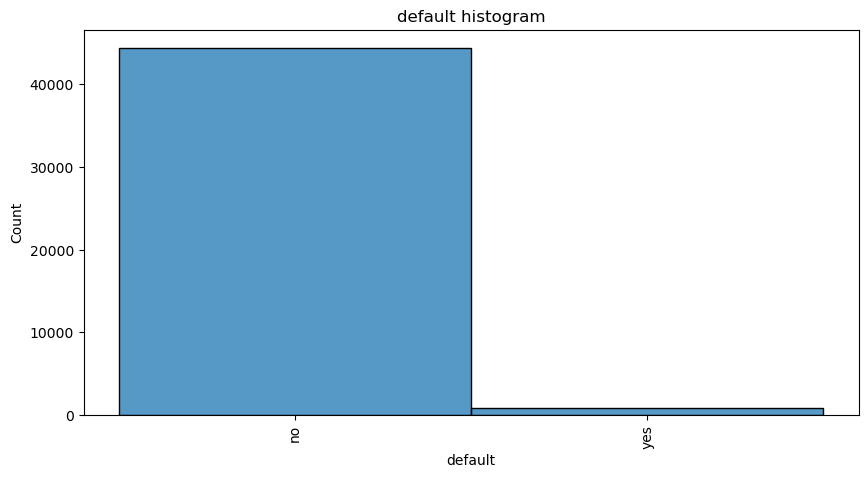

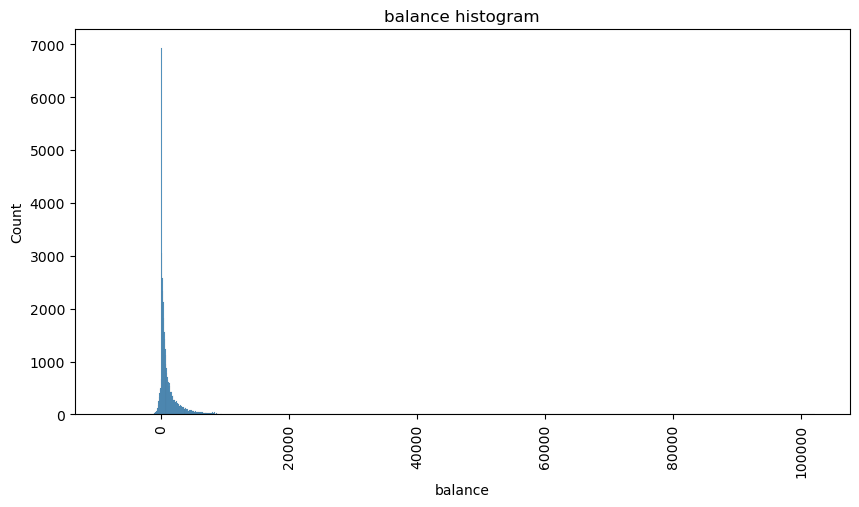

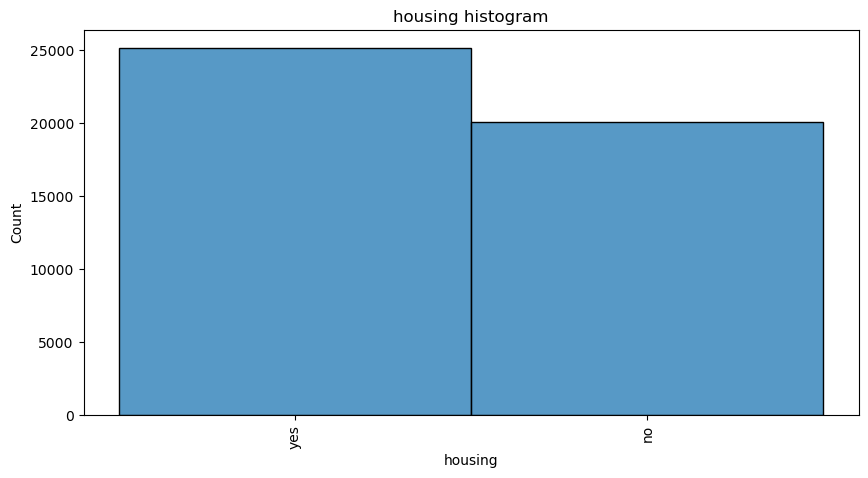

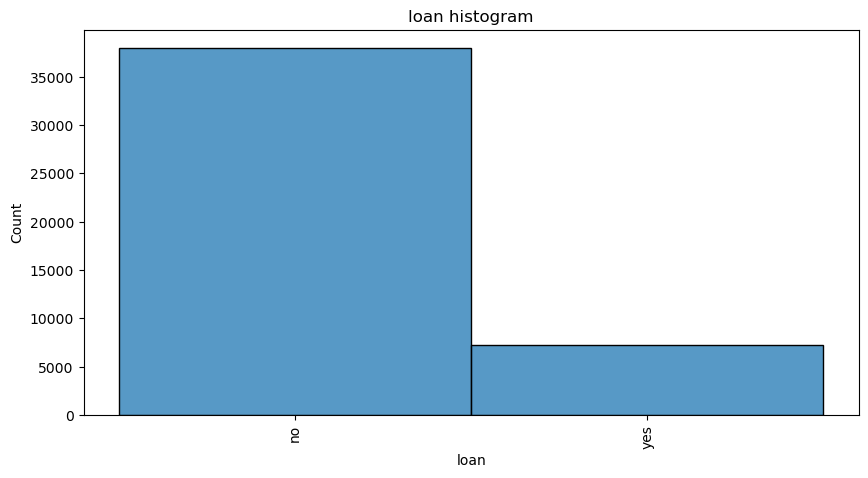

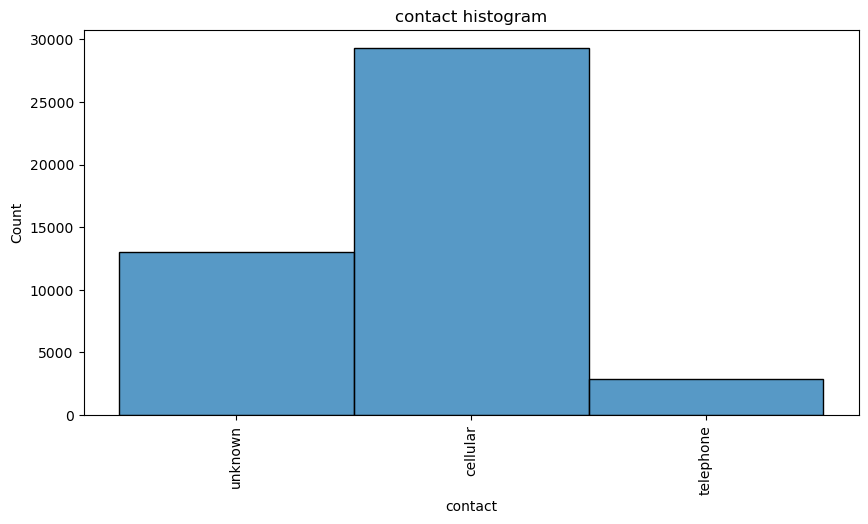

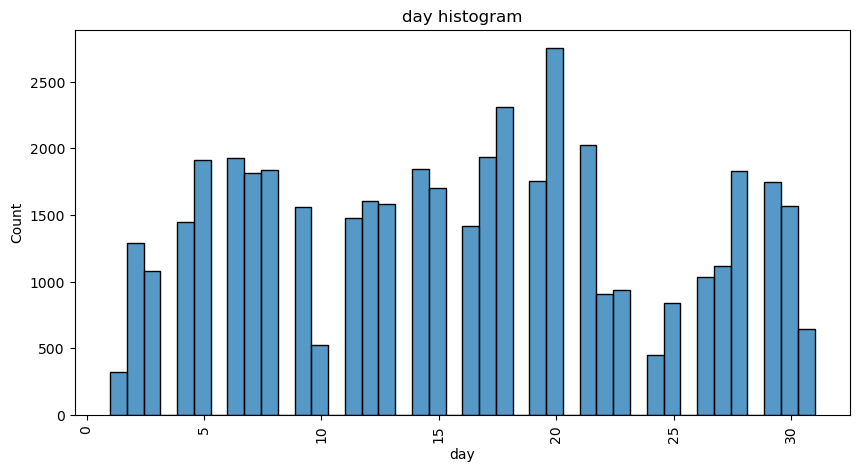

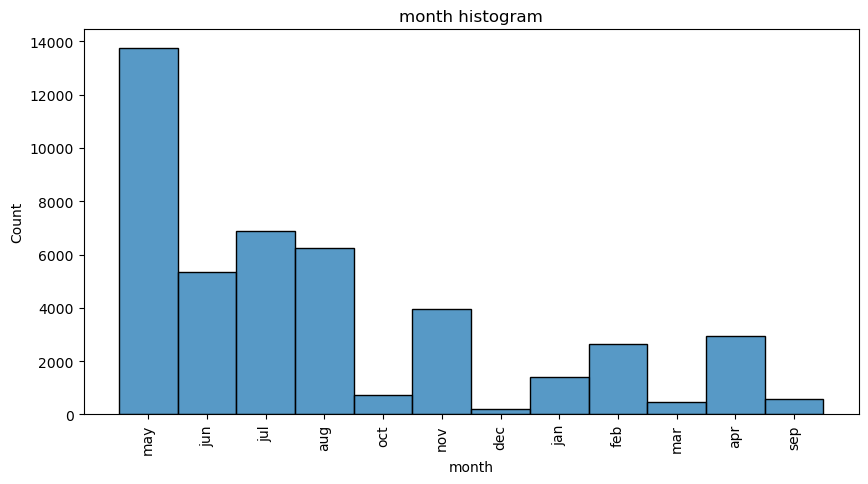

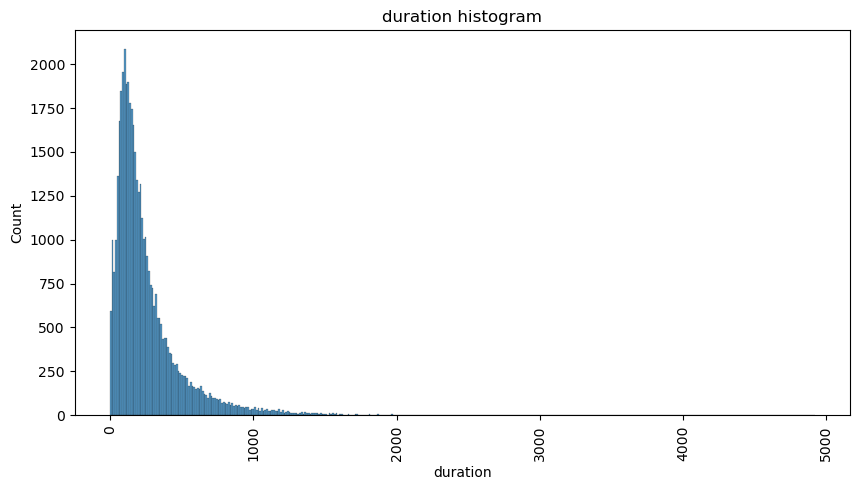

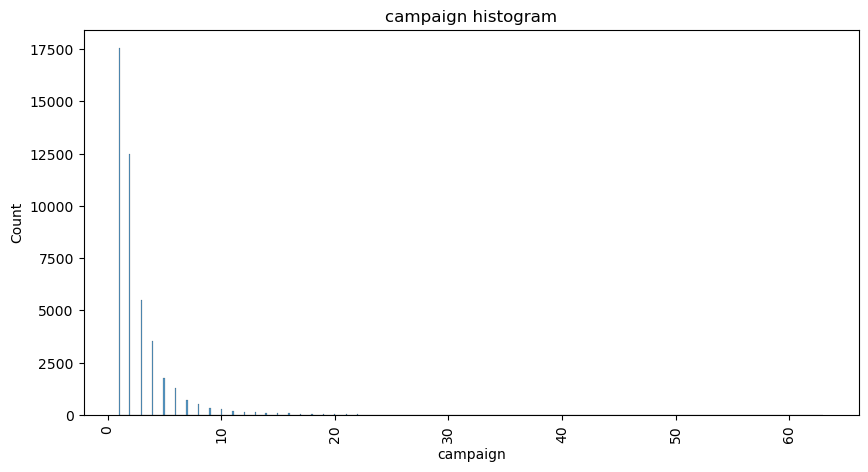

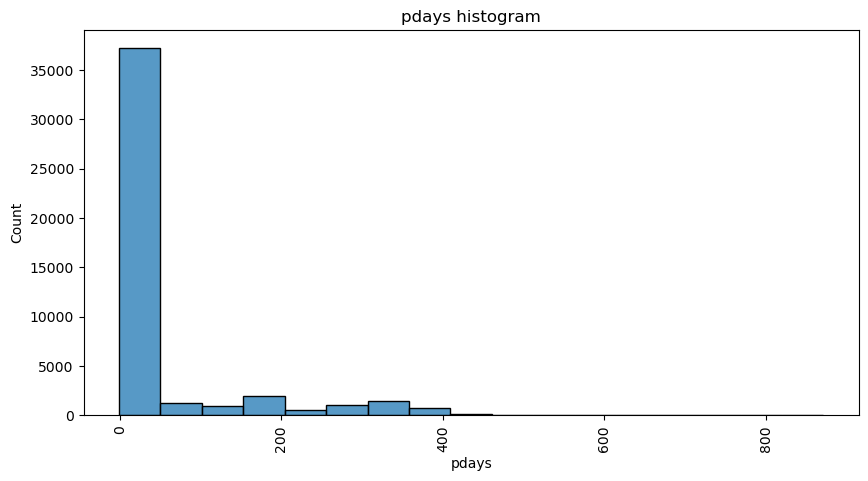

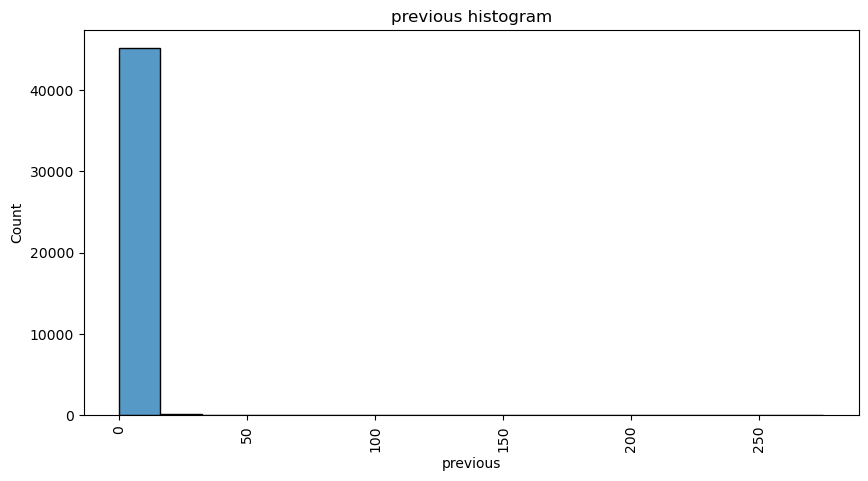

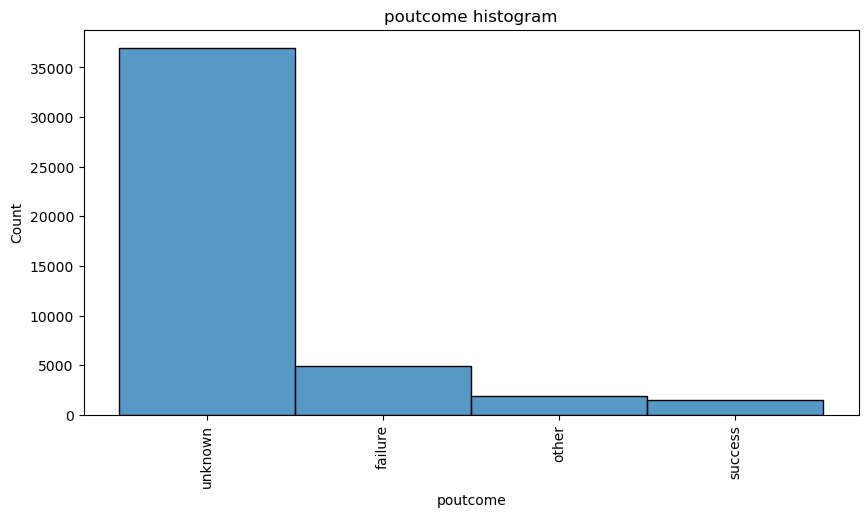

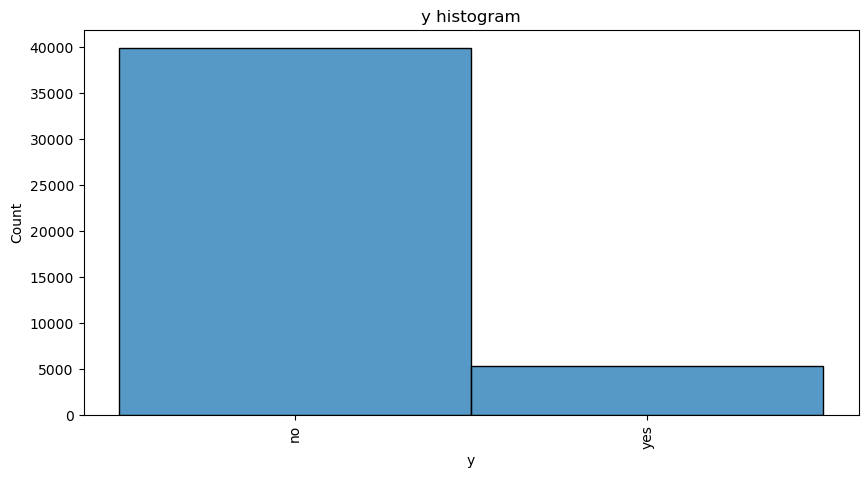

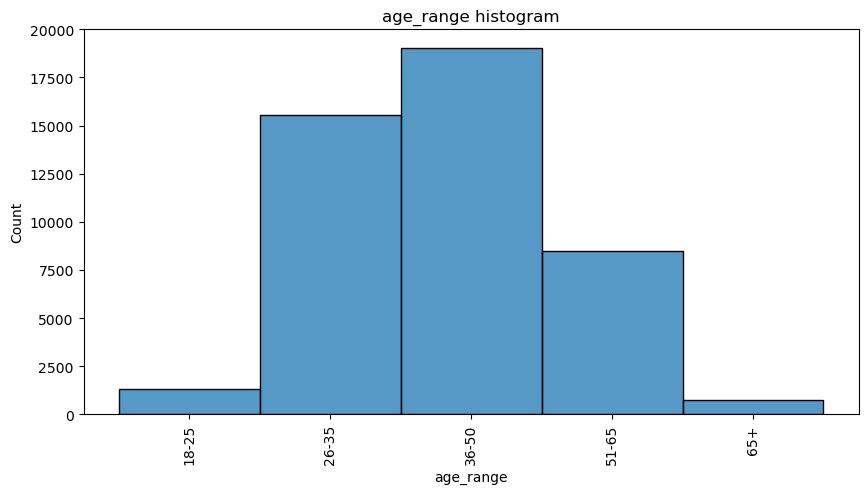

In [13]:
#Check univariate analysis
for col in data.columns:
    fig, ax= plt.subplots(figsize=(10,5))
    ax.tick_params(axis='x', rotation=90)
    plt.title(f'{col} histogram')
    sns.histplot(data=data, x=col, ax=ax)
    plt.show()


# Observations:

-people age from 25 to 60 are most than the other groups.

-married more than sigle and divorced.

-The cellular is the most common used contact method.

-managers then blue-collar and technician are more than the other jobs.

-people don't have a credit in default are more than those who aleady have a credit.

-People don't take a personal loan are more.

-May is the month that has that most processes.

# Checking correlation between continuous columns


In [14]:
data[['age','balance','day','campaign','pdays','previous']].corr()

,age,balance,day,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,0.162490,-0.093044,-0.051710
campaign,0.004760,-0.014578,0.162490,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,-0.032855,0.454820,1.000000


Here's a brief interpretation of the correlations:

-age vs. balance (0.097783): There is a very weak positive correlation between a person's age and their account balance. This means that, on average, older individuals tend to have slightly higher account balances.


-balance vs. day (0.004503): There is a very weak positive correlation between the account balance and the day of the last contact. This correlation suggests that there isn't a strong relationship between these two variables.
    
-day vs. campaign (0.162490): There is a weak positive correlation between the day of the last contact and the number of contacts made during the campaign. This suggests that more contacts are made on certain days.
    
-campaign vs. pdays (-0.088628): There is a weak negative correlation between the number of contacts made during the campaign and the number of days since the client was last contacted. This suggests that as the number of days since the last contact increases, the number of campaign contacts tends to decrease.

-pdays vs. previous (0.454820): There is a moderate positive correlation between the number of days since the client was last contacted and the number of previous contacts. This indicates that clients who were contacted more frequently in the past tend to have longer gaps between contacts.
    
-previous vs. balance (0.016674): There is a very weak positive correlation between the number of previous contacts and the account balance. This suggests that clients with higher account balances tend to have slightly more previous contacts.

In [15]:
# Check rows duplicates
data.duplicated().sum()


0

In [16]:
# Check the unique values of each column
for col in data:
    print(col + ':')
    print(data[col].unique())

age:
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job:
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital:
['married' 'single' 'divorced']
education:
['tertiary' 'secondary' 'unknown' 'primary']
default:
['no' 'yes']
balance:
[ 2143    29     2 ...  8205 14204 16353]
housing:
['yes' 'no']
loan:
['no' 'yes']
contact:
['unknown' 'cellular' 'telephone']
day:
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration:
[ 261  151   76 ... 1298 1246 1556]
campaign:
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 3

In [17]:
for column in data.columns:
    if data[column].dtype == 'float64' or data[column].dtype == 'int64':
        data[column].fillna(data[column].median(), inplace=True)

In [18]:
# Check null values
missing_data=data.isnull().sum()
missing_data

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
age_range    0
dtype: int64

In [19]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_range
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,51-65
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,36-50
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,26-35
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,36-50
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,26-35


# Feature Engineering

In [20]:
# Encode 'month' column with values 1-12
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
data['month'] = data['month'].map(month_mapping)

# Encode 'y' column with 'yes' as 1 and 'no' as 0
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Encode the remaining categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
# Encode the 'age_range' column
data['age_range_encoded'] = label_encoder.fit_transform(data['age_range'])

# Drop the original 'age_range' column if you want
data = data.drop(columns=['age_range'])

# Now, 'age_range_encoded' contains the numerical encoding of the 'age_range' values
# Split the data into train and test
X = data.drop(columns=['y'])  # Feature variables
y = data['y']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train, X_test, y_train, and y_test contain the training and testing data.

In [21]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_range_encoded
45206,51,9,1,2,0,825,0,0,0,17,11,977,3,-1,0,3,1,3
45207,71,5,0,0,0,1729,0,0,0,17,11,456,2,-1,0,3,1,4
45208,72,5,1,1,0,5715,0,0,0,17,11,1127,5,184,3,2,1,4
45209,57,1,1,1,0,668,0,0,1,17,11,508,4,-1,0,3,0,3
45210,37,2,1,1,0,2971,0,0,0,17,11,361,2,188,11,1,0,2


In [22]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_range_encoded
0,58,4,1,2,0,2143,1,0,2,5,5,261,1,-1,0,3,0,3
1,44,9,2,1,0,29,1,0,2,5,5,151,1,-1,0,3,0,2
2,33,2,1,1,0,2,1,1,2,5,5,76,1,-1,0,3,0,1
3,47,1,1,3,0,1506,1,0,2,5,5,92,1,-1,0,3,0,2
4,33,11,2,3,0,1,0,0,2,5,5,198,1,-1,0,3,0,1


# 3. Model Development:

In [23]:
# Split the data into features (X) and target (y)
X_train = data.drop(columns=['y'])
y_train = data['y']
X_test = data.drop(columns=['y'])
y_test = data['y']


In [24]:
print(data['y'].value_counts())


0    39922
1     5289
Name: y, dtype: int64


Logistic Regression Metrics:
Accuracy: 0.89
Precision: 0.58
Recall: 0.20
F1-score: 0.30
ROC AUC: 0.86


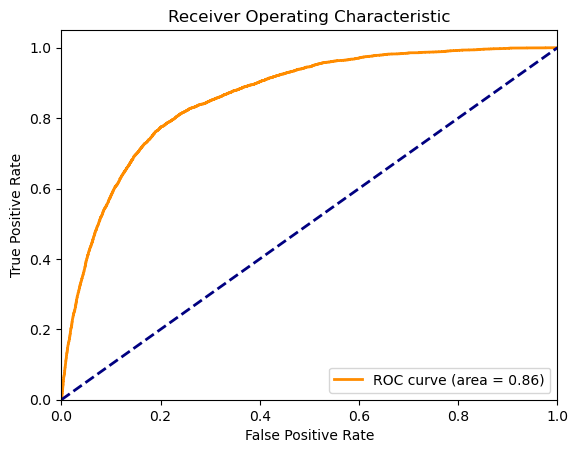

Random Forest Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
ROC AUC: 1.00


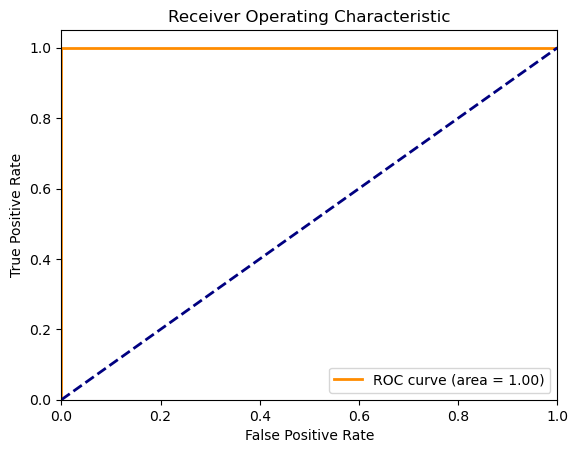

Gradient Boosting Metrics:
Accuracy: 0.91
Precision: 0.68
Recall: 0.40
F1-score: 0.51
ROC AUC: 0.93


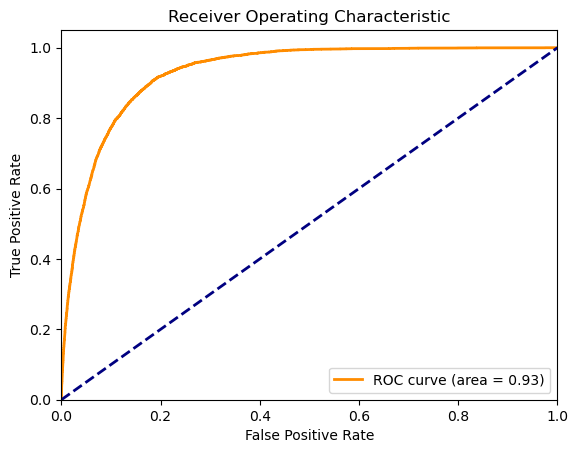

Neural Network Metrics:
Accuracy: 0.87
Precision: 0.46
Recall: 0.51
F1-score: 0.48
ROC AUC: 0.84


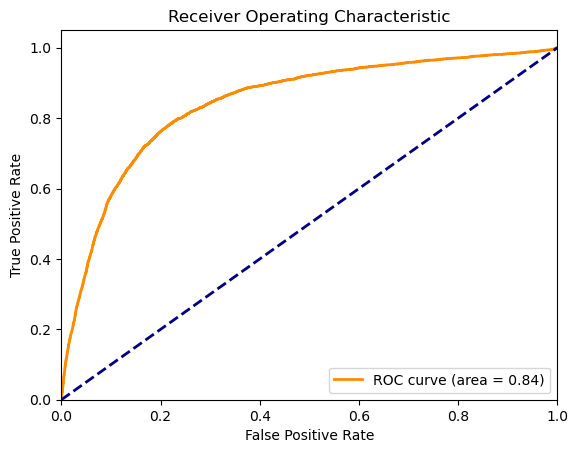

SVM Metrics:
Accuracy: 0.88
Precision: 0.56
Recall: 0.01
F1-score: 0.02
The best model is RandomForestClassifier()


In [26]:
# Convert target variable to binary labels
#y_train_binary = (y_train == 'yes').astype(int)
#y_test_binary = (y_test == 'yes').astype(int)

# Initialize and train different models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=10000)),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("Neural Network", MLPClassifier(max_iter=1000)),
    ("SVM", SVC(probability=True))  # Enable probability for ROC AUC
]

best_model = None
best_accuracy = 0

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    
    if name != "SVM":  # SVM doesn't provide probabilities
        y_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        print(f"ROC AUC: {roc_auc:.2f}")
        
        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
    
    if accuracy > best_accuracy and accuracy<1:
        best_accuracy = accuracy
        best_model = model

print(f"The best model is {best_model}")


# Step 4: Feature Importance Analysis
# Rank the importance of features using the best model

Feature Importance Analysis:
              Feature  Importance
11           duration    0.288033
5             balance    0.105468
9                 day    0.094147
0                 age    0.091944
10              month    0.083508
13              pdays    0.052716
15           poutcome    0.049466
1                 job    0.047621
12           campaign    0.038351
3           education    0.027247
6             housing    0.024953
16  age_range_encoded    0.024696
2             marital    0.021125
14           previous    0.019828
8             contact    0.019715
7                loan    0.009341
4             default    0.001839


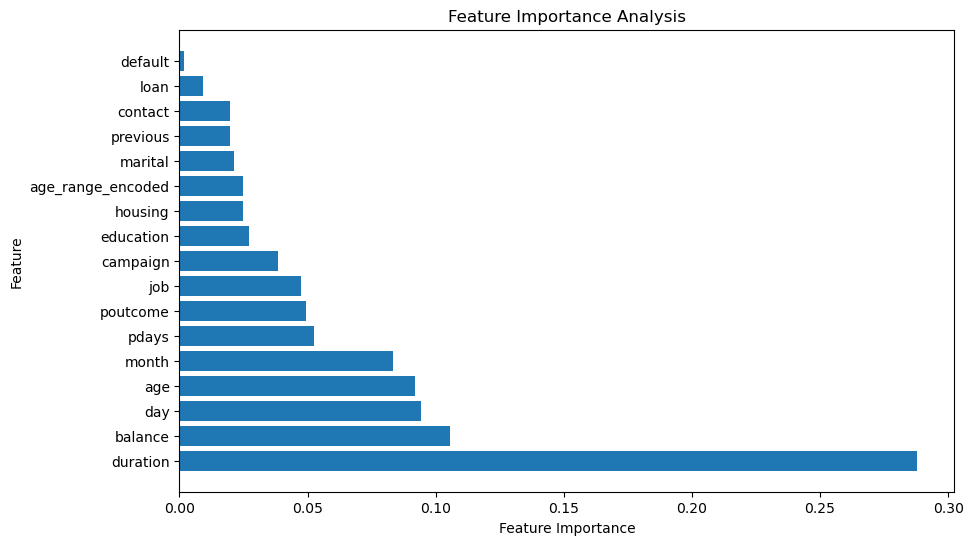

In [29]:
# Fit the best model (RandomForestClassifier) to the training data
best_model.fit(X_train, y_train)

# Get feature importances from the model
feature_importances = best_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importance Analysis:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.show()

# Propensity Score Model Development

In [31]:
# Step 1: Propensity Score Model Development
propensity_model = LogisticRegression(max_iter=10000)
propensity_model.fit(X_train, y_train)

# Step 2: Predict Propensity Scores
train_propensity_scores = propensity_model.predict_proba(X_train)[:, 1]
test_propensity_scores = propensity_model.predict_proba(X_test)[:, 1]

# Step 3: Identify High-Value Leads
threshold = 0.5  # Adjust this threshold as needed
train_high_value_leads = (train_propensity_scores >= threshold)
test_high_value_leads = (test_propensity_scores >= threshold)

# Print the counts of high-value leads in the training and testing sets
print("High-Value Leads in Training Data:", train_high_value_leads.sum())
print("High-Value Leads in Testing Data:", test_high_value_leads.sum())

High-Value Leads in Training Data: 1846
High-Value Leads in Testing Data: 1846


In [ ]:
# Strategy based on month and day of the week
month_optimized = train_data.groupby('month').size().idxmax()
day_optimized = train_data.groupby('day_of_week').size().idxmax()

# Strategy based on previous contact
recent_contact = data[data['pdays'] < 15]  # contacts made in the last 15 days

# Strategy based on economic conditions
good_economic_condition = data[data['nr.employed'] > data['nr.employed'].median()]
bad_economic_condition = data[data['nr.employed'] <= data['nr.employed'].median()]

print(f"Best month to contact: {month_optimized}")
print(f"Best day of the week to contact: {day_optimized}")

# Adjusting messaging based on economic conditions
if len(good_economic_condition) > len(bad_economic_condition):
    print("Focus on messaging highlighting the positive economic condition.")
else:
    print("Focus on messaging catering to a cautious economic condition.")

# Adjusting frequency based on previous contacts
if len(recent_contact) > len(data) * 0.5:
    print("You're contacting many leads recently. Ensure not to over-contact.")
else:
    print("Keep the communication frequent, but don't overwhelm the leads.")

In [ ]:
print(data.head())
